In [4]:
import pandas as pd
from sklearn import linear_model

beer = pd.read_csv('lager_antioxidant_reg.csv')
beer.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [5]:
x_columns = [col for col in beer.columns.values if col != "tpc"]
beer_x = beer[x_columns]
beer_y = beer["tpc"]

beer_model = linear_model.LinearRegression()

In [6]:
beer_model.fit(beer_x, beer_y)
#now we print the model coefficients
beer_model.intercept_

18.830383913148466

In [7]:
beer_model.coef_

array([ 5.84731786e-02,  1.28827809e+00,  1.27650959e+02, -6.14737240e-01,
       -1.09375291e+00,  7.35403422e+01,  3.76892085e-01])

In [8]:
#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained by the model
beer_model.score(beer_x, beer_y)

0.8219280156188545

0.8219280156188545

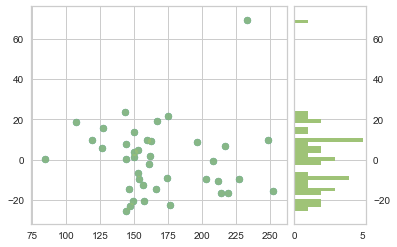

In [18]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(beer_model, hist=False)
visualizer = ResidualsPlot(beer_model, hist=True)
visualizer.fit(beer_x, beer_y)  # Fit the training data to the model
visualizer.score(beer_x, beer_y)  

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

In [16]:
%matplotlib inline
# visualizer.poof()   

In [ ]:
!pip install patsy
!pip install statsmodels

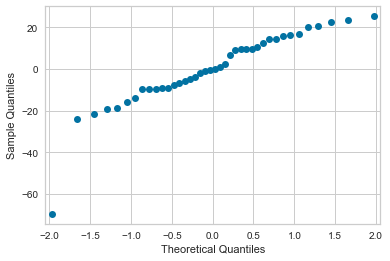

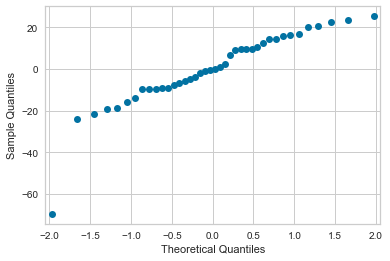

In [19]:
import statsmodels.api as sm

predictions = beer_model.predict(beer_x)
residuals = beer_y - predictions
sm.qqplot(residuals)

In [28]:
titanic = pd.read_csv('titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
titanic_drop = titanic.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [31]:
titanic_missing = titanic_drop.dropna()
titanic_missing

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [32]:
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_with_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
x_columns = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
titanic_x = titanic_with_dummies[x_columns]
titanic_y = titanic_with_dummies["Survived"]
titanic_model = LogisticRegression()
titanic_model.fit(titanic_x, titanic_y)
titanic_model.score(titanic_x, titanic_y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

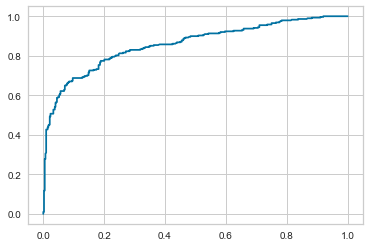

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(titanic_y,  y_pred_proba)
auc = metrics.roc_auc_score(titanic_y, y_pred_proba)
plt.plot(fpr,tpr)
